# Hello, everyone!
### This is my first public notebook in Kaggle. 
A little inroduction of myself. I'm a new in Data Science and Machine Learning, deeping into these subjects toughly. I will appreciate for any your feedbacks, advices or critiques.

# Let's begin

Today we have some datasets about house renting in Brazil. Actually, as other kagglers mentioned, it's pretty similar to next competitions:


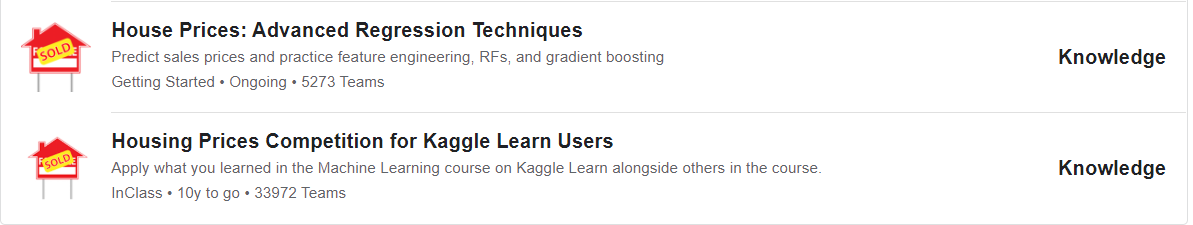


Almost every kaggler participates there if they did Kaggle Courses: https://www.kaggle.com/learn/overview, so I suppose it's easy to understand.


## First of all, importing modules

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data exploratory

We will work with two datasets, both of them describe the same characteristics, but they have some differences.[](http://)

In [ ]:
data = pd.read_csv("/kaggle/input/brasilian-houses-to-rent/houses_to_rent.csv")
data2 = pd.read_csv("/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv")

In [ ]:
# Unexpected "Unnamed: 0" column meaning id column
data

In [ ]:
data2

## First dataset

We have no idea what 1 and 0 

In [ ]:
print(data['city'].value_counts(), "\n") # Sao Paulo?
print(data2['city'].value_counts())

Seems that value "1" in first dataset is São Paulo due to large size of values

In order not to guess, just ask author :)

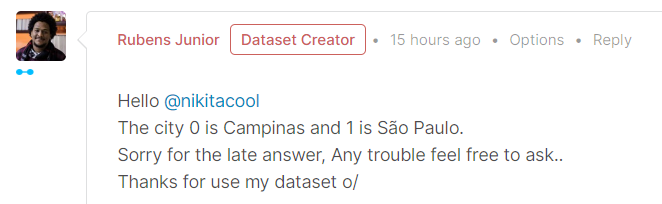

So, we have the answer.

In [ ]:
# Copy the data
data_city = data

## Doing data cleaning and feature engineering for first dataset

In [ ]:
data_city = data.drop('Unnamed: 0', axis=1)

# In order to label encoding of the second dataset I change to another numbers now.
data_city['city'] = data_city['city'].replace(1,4)
data_city['city'] = data_city['city'].replace(0,1)

In [ ]:
data_city['hoa (R$)'] = data_city['hoa']
data_city['rent amount (R$)'] = data_city['rent amount']
data_city['property tax (R$)'] = data_city['property tax']
data_city['fire insurance (R$)'] = data_city['fire insurance']

data_city = data_city.drop('total', axis=1)
data_city = data_city.drop('hoa', axis=1)
data_city = data_city.drop('rent amount', axis=1)
data_city = data_city.drop('property tax', axis=1)
data_city = data_city.drop('fire insurance', axis=1)

In [ ]:
for i in data_city:
    data_city[i] = data_city[i].replace("-", 1)

In [ ]:
def convert_to_num(value):
    num = value.replace('R$', '')
    num = num.replace(',', '')
    num = float(num)
    return num

In [ ]:
data_city['hoa (R$)'] = data_city['hoa (R$)'].replace("Sem info", '0')
data_city['hoa (R$)'] = data_city['hoa (R$)'].replace("Incluso", '0')

data_city['property tax (R$)'] = data_city['property tax (R$)'].replace("Sem info", '0')
data_city['property tax (R$)'] = data_city['property tax (R$)'].replace("Incluso", '00')

data_city['hoa (R$)'] = data_city['hoa (R$)'].apply(lambda x: convert_to_num(x))
data_city['rent amount (R$)'] = data_city['rent amount (R$)'].apply(lambda x: convert_to_num(x))
data_city['property tax (R$)'] = data_city['property tax (R$)'].apply(lambda x: convert_to_num(x))
data_city['fire insurance (R$)'] = data_city['fire insurance (R$)'].apply(lambda x: convert_to_num(x))


In [ ]:
data_city['animal'] = data_city['animal'].apply(lambda x : 1 if x=='acept' else 0)
data_city['furniture'] = data_city['furniture'].apply(lambda x : 1 if x=='furnished' else 0)

data_city['floor'] = pd.to_numeric(data_city['floor'])

In [ ]:
data_['floor'] = pd.to_numeric(data_['floor'])

Okey, I've done with the first dataset

In [ ]:
data_city

# Second dataset

The second dataset is more prepared, so we just need to fix a little bit and do earlier steps

In [ ]:
data2

In [ ]:
# Make a copy of data2
data_city_2 = data2.copy(deep=True)

In [ ]:
for i in data_city_2:
    data_city_2[i] = data_city_2[i].replace("-", 1)

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data_city_2['city'] = label.fit_transform(data_city_2['city'])

### Let's stop here!
We should look on a number of different cities in both datasets

In [ ]:
data_city['city'].value_counts()

In [ ]:
data_city_2['city'].value_counts()

We can see that if we concatenate datasets directly, we will get over 10k Sao Paulo cities. It's too much and it will affect on model accuracy badly. So let's add only Campinas cities.

In [ ]:
# Add Campinas
Campinas_data = data_city[data_city['city']==1]
data_city_2 = pd.concat([data_city_2, Campinas_data])

In [ ]:
data_city_2['animal'] = data_city_2['animal'].apply(lambda x : 1 if x=='acept' else 0)
data_city_2['furniture'] = data_city_2['furniture'].apply(lambda x : 1 if x=='furnished' else 0)

In [ ]:
data_ = data_city_2.drop('total (R$)', axis=1)

Our final dataset is

In [ ]:
data_

# Data analysis

Honestly, I'm not strong in statistics. Here, I will show steps, what I have to do.

In [ ]:
# import modules
import matplotlib.pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
%pylab inline

Look on a correlation beetween objects

In [ ]:
plt.figure(figsize =(10,10))
corr = data_.corr()
sns.heatmap(corr, annot =True)

What about object relationships respect to rent amount?

In [ ]:
num = 0
num_col = [col for col in data_ if data_[col].dtype != np.dtype(np.object)]

pyplot.figure(figsize=(25,25))

for i in num_col:
    num += 1
    pyplot.subplot(5,4,num)
    pyplot.scatter(data_[i], data_['rent amount (R$)'], s=1)
    pyplot.title(i)

We can see a few number of outliers in some plots. What are they?

In [ ]:
# It seems unrealistic.
data_[data_['hoa (R$)'] > 20000]

In [ ]:
# and here
data_[data_['property tax (R$)'] > 20000]

In [ ]:
# and here
data_[data_['area'] > 22000]

Okey, we saw some cases with enormous values. What could it be? Maybe it's some mistake or personal opinion or possible housing of some famous person, We don't care, because our goal is objectivity. So, just drop them all.

In [ ]:
data_ = data_.drop(data_[data_['property tax (R$)'] > 20000].index, axis=0 )
data_ = data_.drop(data_[data_['hoa (R$)'] > 20000].index, axis=0 )
data_ = data_.drop(data_[data_['area'] > 12000].index, axis=0 )

In [ ]:
num = 0
num_col = [col for col in data_ if data_[col].dtype != np.dtype(np.object)]

pyplot.figure(figsize=(25,25))

for i in num_col:
    num += 1
    pyplot.subplot(5,4,num)
    pyplot.scatter(data_[i], data_['rent amount (R$)'], s=1)
    pyplot.title(i)

Looks better

In [ ]:
data_.skew()

# Building a model

### So, let's discuss why we need a model.

A simple idea is predicting rent prices considering some data. Okey, we can use it for that goal. But what if we will develop for another case? Just imagine that you want to lease your property and you're not sure about rent price. 

Let's manage it. We will take some data from first dataset to compare with our future predictions.

In [ ]:
test_data = data_city[:5]

predict = test_data.drop(['rent amount (R$)'], axis=1)
actual = test_data['rent amount (R$)']

Training the model

In [ ]:
X = data_.drop(['rent amount (R$)'], axis=1)
y = data_['rent amount (R$)']

Let's use Liner Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.75, test_size=0.25)

model = LinearRegression()
model.fit(train_X, train_y)

Let's see how big is the error

In [ ]:
pred = model.predict(valid_X)
mae(pred, valid_y)

![](http://)Our mean absolute error is about 210. It doesn't works with property recommendations. Give a last chance and let's do with more comlex model :)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model2 = XGBRegressor()
model2.fit(train_X, train_y)

pred = model2.predict(valid_X)
mae(pred, valid_y)

It's much better. What about recommendations?

In [ ]:
final_pred = model2.predict(predict)

print("Predicted/Recommended Rent Price =" ,final_pred)
print("Actual Rent Price =", list(actual))

Looks nice, but not the final version. Thanks for watching :)